Подключаем основные библиотеки/пакеты

In [1]:
# conda install -c plotly plotly

In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import xlrd

import math
import os
import re


from numba import njit
from numba import  prange
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go

In [3]:
colours_ = ['blue', 'orange', 'green', 'red', 'mediumpurple', 'blue', 'orange', 'green', 'red', 'mediumpurple', 'blue', 'orange', 'green', 'red', 'mediumpurple']
#colours_ = ['mediumpurple', 'mediumpurple', 'blue', 'blue', 'mediumpurple', 'black', 'brown', 'gray']
markers_ = ['-', '-', '-', '-', '-', '--', '--', '--', '--', '--', ':', ':', ':', ':', ':']
markers_ = [".", "d", "<", ">", "^", "v", "s"]
linestyle = ['-',  ':', '--', '-.', ',', '.']

In [4]:
#В данном списке содержатся величины выходных радиусов исследуемых волок
R1 = [(0.412)/2,(0.738)/2,(2.23)/2]
R0 = [(0.420)/2,(0.771)/2,(2.45)/2]

D1 = [(0.412)/1000,(0.738)/1000,(2.23)/1000]

In [5]:
#path_for_pictures = 'T:\\Projects\\380\\Scripts\\test_project\\data_txt\\pictures\\'
#path_for_pictures = 'C:\\Users\\LabPC_807\\Desktop\\For calculations 07042022\\'
#path_for_pictures = 'C:\\Users\\acer\\PycharmProjects\\Wire_drawing\\'
#path_for_pictures ='C:\\Users\\acer\\PycharmProjects\\Wire_drawing\\'
path_for_pictures = 'C:\\Users\\acer\\txt_итог_отчет\\'

Выгрузка и предобработка результатов вычислительных экспериментов

In [6]:
#Предполагается , что результаты будут сгруппированы по различным длинам волок L1,L2,L3
#example_dir = 'T:\\Projects\\380\\Scripts\\test_project\\data_txt\\conical\\0420\\'
#example_dir = 'C:\\Users\\LabPC_807\\Desktop\\For calculations 07042022\\'
example_dir = 'C:\\Users\\acer\\txt_итог_отчет\\'

def read_data_txt_np(name_of_file,example_dir):
    content = os.listdir(example_dir)
    if os.path.isfile(os.path.join(example_dir, name_of_file)):
        file = os.path.join(example_dir, name_of_file)
        if file.endswith('.txt'):
             data = np.loadtxt(file,dtype='double',skiprows=56)

    return data

In [7]:
#example_dir = 'T:\\Projects\\380\\Scripts\\test_project\\data_txt\\conical\\0420\\'
#example_dir = 'C:\\Users\\LabPC_807\\Desktop\\For calculations 07042022\\'
example_dir = 'C:\\Users\\acer\\txt_итог_отчет\\'
#example_dir = 'C:\\Users\\acer\\PycharmProjects\\Wire_drawing\\'
#list_5 =['+0420_1_l0_fric_010conical.txt']
list_5 =['Mat_1_1.txt']
read_data_txt_np(list_5[0],example_dir)

UnboundLocalError: local variable 'data' referenced before assignment

In [8]:
%%time
file = read_data_txt_np(list_5[0],example_dir)

UnboundLocalError: local variable 'data' referenced before assignment

In [9]:
def median_np(x): 
    """ Построение медианы по переданному списку """
    return np.median(x)

In [ ]:
# @njit(parallel=True)
def preprocessing_res_np(file):
    x_1 = (file[::, 1]) * 10**3
    y_1 = (file[::, 2]) * 10**3

    eps_11_name = file[::, 11]
    eps_22_name = file[::, 12]
    eps_33_name = file[::, 13]
    eps_12_name = file[::, 14]

    stress_11_name = (file[::, 3]) / 10**6
    stress_22_name = (file[::, 4]) / 10**6
    stress_33_name = (file[::, 5]) / 10**6
    stress_12_name = (file[::, 6]) / 10**6

    # nt11_name = (file[::,15])
    # temp_name = (file[::,16])

    index = 0

    x_1_ = np.zeros((1, 1))
    y_1_ = np.zeros((1, 1))
    Strain = np.zeros((1, 5))
    Stress = np.zeros((1, 5))
    # NT11 = np.zeros((1, 1))
    # TEMP = np.zeros((1, 1))
    # ind_ = np.zeros((1,1))
    for j in range(0, np.shape(y_1)[0]):
        if y_1[j] >= 0.25 * (np.max(y_1) - np.min(y_1)) and y_1[j] <= 0.75 * (
            np.max(y_1) - np.min(y_1)
        ):
            x_1_[index] = x_1[j]
            y_1_[index] = y_1[j]
            # ind_[index] = j

            Stress[index, 0] = stress_11_name[j]
            Stress[index, 1] = stress_22_name[j]
            Stress[index, 2] = stress_33_name[j]
            Stress[index, 3] = stress_12_name[j]
            Stress[index, 4] = (1 / (np.sqrt(2))) * np.sqrt(
                (stress_11_name[j] - stress_22_name[j]) ** 2
                + (stress_22_name[j] - stress_33_name[j]) ** 2
                + (stress_33_name[j] - stress_11_name[j]) ** 2
                + 6 * (stress_12_name[j] ** 2)
            )

            Strain[index, 0] = eps_11_name[j]
            Strain[index, 1] = eps_22_name[j]
            Strain[index, 2] = eps_33_name[j]
            Strain[index, 3] = eps_12_name[j]
            Strain[index, 4] = (1 / (np.sqrt(2))) * np.sqrt(
                (eps_11_name[j] - eps_22_name[j]) ** 2
                + (eps_22_name[j] - eps_33_name[j]) ** 2
                + (eps_33_name[j] - eps_11_name[j]) ** 2
                + 6 * (eps_12_name[j] ** 2)
            )

            # NT11[index]=nt11_name[j]
            # TEMP[index]=temp_name[j]

            x_1_ = np.concatenate((x_1_, np.zeros((1, 1))))
            y_1_ = np.concatenate((y_1_, np.zeros((1, 1))))
            Stress = np.concatenate((Stress, np.zeros((1, 5))))
            Strain = np.concatenate((Strain, np.zeros((1, 5))))
            # NT11 = np.concatenate((NT11,np.zeros((1,1))))
            # TEMP = np.concatenate((TEMP,np.zeros((1,1))))
            index = index + 1

    return x_1_, y_1_, Stress, Strain  # , NT11, TEMP #ind_

In [11]:
def average_val_np(array_1):
    """ Построение осредненных распределений """
    b=np.zeros((13))
    for i in range(0,13):
        b[i]=np.median(np.array_split(array_1,13)[i])

    return b

In [12]:
def max_val_np(array_1):
    """ Построение осредненных распределений """
    b=np.zeros((13))
    for i in range(0,13):
        b[i]=np.max(np.array_split(array_1,13)[i])

    return b

In [13]:
def min_val_np(array_1):
    """ Построение осредненных распределений """
    b=np.zeros((13))
    for i in range(0,13):
        b[i]=np.min(np.array_split(array_1,13)[i])

    return b

In [14]:
def files_list(list_one,dir_):
    list_files = []
    for i in range(0,len(list_one)):
        file = read_data_txt_np(list_one[i],dir_)
        list_files.append(file)

    return list_files

In [15]:
list_files = []
for i in range(0,len(list_one)):
    file = read_data_txt_np(list_one[i],dir_)
    list_files.append(file)

#return list_files

NameError: name 'list_one' is not defined

In [16]:
%%time
list_l0 =['+2450_1_l0_fric_050_bell_thermal.txt',
                    '+2450_1_l0_fric_050_convex_thermal.txt',
                    '+2450_1_l0_fric_050_parabolic_thermal.txt',
                    '+2450_1_l0_fric_050_twin-elliptical_thermal.txt'
                    #'+2450_1_l01_fric_050_bell_thermal.txt',
                    #'+2450_1_l01_fric_050_convex_thermal.txt',
                    #'+2450_1_l01_fric_050_parabolic_thermal.txt',
                    #'+2450_1_l01_fric_050_twin-elliptical_thermal.txt',
                    #'+2450_1_l03_fric_050_bell_thermal.txt',
                    #'+2450_1_l03_fric_050_convex_thermal.txt',
                    #'+2450_1_l03_fric_050_parabolic_thermal.txt',
                    #'+2450_1_l03_fric_050_twin-elliptical_thermal.txt',
                    #'+2450_1_l05_fric_050_bell_thermal.txt',
                    #'+2450_1_l05_fric_050_convex_thermal.txt',
                    #'+2450_1_l05_fric_050_parabolic_thermal.txt',
                    #'+2450_1_l05_fric_050_twin-elliptical_thermal.txt',
                    #'+2450_1_l075_fric_050_bell_thermal.txt',
                    #'+2450_1_l075_fric_050_convex_thermal.txt',
                    #'+2450_1_l075_fric_050_parabolic_thermal.txt',
                    #'+2450_1_l075_fric_050_twin-elliptical_thermal.txt'
                   ]
list_l01 =['+2450_1_l01_fric_050_bell_thermal.txt',
            '+2450_1_l01_fric_050_convex_thermal.txt',
            '+2450_1_l01_fric_050_parabolic_thermal.txt',
            '+2450_1_l01_fric_050_twin-elliptical_thermal.txt']
list_l03 =['+2450_1_l03_fric_050_bell_thermal.txt',
            '+2450_1_l03_fric_050_convex_thermal.txt',
            '+2450_1_l03_fric_050_parabolic_thermal.txt',
            '+2450_1_l03_fric_050_twin-elliptical_thermal.txt']
list_l05 =['+2450_1_l05_fric_050_bell_thermal.txt',
            '+2450_1_l05_fric_050_convex_thermal.txt',
            '+2450_1_l05_fric_050_parabolic_thermal.txt',
            '+2450_1_l05_fric_050_twin-elliptical_thermal.txt']
list_l075 = [ '+2450_1_l075_fric_050_bell_thermal.txt',
            '+2450_1_l075_fric_050_convex_thermal.txt',
                '+2450_1_l075_fric_050_parabolic_thermal.txt',
                '+2450_1_l075_fric_050_twin-elliptical_thermal.txt']

twin_elliptical_thermal = ['+2450_1_l0_fric_050_twin-elliptical_thermal.txt',
                           '+2450_1_l01_fric_050_twin-elliptical_thermal.txt',
                           '+2450_1_l03_fric_050_twin-elliptical_thermal.txt',
                           '+2450_1_l05_fric_050_twin-elliptical_thermal.txt',
    '+2450_1_l075_fric_050_twin-elliptical_thermal.txt']
#list_files = []
#for i in range(0,len(list_one)):
#    file = np.loadtxt(dir_+list_one[i],dtype='double',skiprows=56)
#    list_files.append(file)

#read_data_txt_np(list_conical_fric_050_[2)
dir_ = 'C:\\Users\\Dmitriy\\Desktop\\380\\'
dir_ = 'C:\\Users\\Lenovo\\Downloads\\Reports_thermal\\'
dir_ = 'C:\\Users\\Lenovo\\Downloads\\Reports_isothermal\\'
dir_ = 'C:\\Users\\acer\\txt_итог_отчет\\'
#list_files_1=files_list(list_conical_test,dir_)




CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
def list_of_files(list_):
    list_files = []
    for i in range(0,len(list_)):
        file = np.loadtxt(dir_+list_[i],dtype='double', skiprows=56)
        list_files.append(file)
    return list_files

In [18]:
l0 = list_of_files(list_l0)
l01 = list_of_files(list_l01)
l03 = list_of_files(list_l03)
l05 = list_of_files(list_l05)
l075 = list_of_files(list_l075)
twin_elliptical = list_of_files(twin_elliptical_thermal)

In [19]:
def average_stress_intensity_np(list_files, R1, labels, name):
    # plt.figure(figsize=(16,10)) # plt.figure(figsize=(13,9))
    types = ['Сигмоидальная', 'Дв. эллипт.', 'Дв. параб.', 'Рад. выпуклая', 'Коническая']
    frictions = np.array((0.01, 0.025, 0.05))
    global colours_
    global markers_

    # sigmas = np.zeros(len(list_files))
    deltas = np.zeros((len(list_files), len(list_files)))
    sigmas = np.zeros((len(list_files), len(list_files)))
    result = np.zeros(len(list_files)//3)
    max_amplitude = np.zeros(len(list_files))
    fr_plot = []

    for i in range(0,len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        sigma = average_val_np(preprocessing_res_np(list_files[i])[2][::,4])
        if i == 0:
            deltas = np.zeros((len(list_files), len(sigma)))
            sigmas = np.zeros((len(list_files), len(sigma)))
        sigmas[i] = np.copy(sigma)
        max_amplitude[i] = np.max(sigmas[i])
    #     if i <= 4:
    #         plt.plot(x_1/R1,sigma, markers_[i],markersize=9, color = colours_[i], label=labels[i])
    #     else:
    #         plt.plot(x_1/R1,sigma, markers_[i],markersize=9, color = colours_[i])
    # plt.xlim(0, 1.01)
    # plt.tick_params(axis='x', length=10, labelsize = 20, zorder=15)
    # plt.tick_params(axis='y', length=10, labelsize = 20, zorder=15)
    # plt.xticks(np.arange(0, 1.02, 0.2))
    #
    # plt.ylabel('$\sigma_{i}$, MPa ', fontsize=24) #, fontname='Times New Roman')
    # plt.xlabel(' r, -', fontsize=24) #, fontname='Times New Roman')
    # plt.legend(loc='best', fontsize = 24) #plt.legend(loc='best')

    # for i in range(len(list_files)):
    #
    #     for j in range(len(list_files)):
    #         if np.abs(i-j) % (5) == 0:
    #             S_i = (2. * np.sum(sigmas[i]) - sigmas[i][0] - sigmas[i][-1]) * 1.
    #             S_j = (2. * np.sum(sigmas[j]) - sigmas[j][0] - sigmas[j][-1]) * 1.
    #             deltas[i][j] = S_i - S_j

    S = np.zeros(3)
    for i in range(len(list_files)//3):
        S[0] = (2. * np.sum(sigmas[i]) - sigmas[i][0] - sigmas[i][-1]) * 1.
        S[1] = (2. * np.sum(sigmas[i+5]) - sigmas[i+5][0] - sigmas[i+5][-1]) * 1.
        S[2] = (2. * np.sum(sigmas[i+10]) - sigmas[i+10][0] - sigmas[i+10][-1]) * 1.
        result[i] = np.max(S)

    helper = np.zeros(3)
    for i in range(len(list_files)//3):
        helper[0] = max_amplitude[i]
        helper[1] = max_amplitude[i+5]
        helper[2] = max_amplitude[i+10]
        max_amplitude[i] = np.max(helper)
        fr_plot.append(frictions[np.argmax(helper)])
    max_amplitude = max_amplitude[:len(list_files)//3]

    # for i in range(len(list_files)):
    #     for j in range(len(list_files)):

    # result = np.max(deltas, axis=0)
    # print('sigmas:\n', sigmas)
    # print('max_amplitude:\n', max_amplitude)
    # print('result:\n', result)

    plt.plot(types, result, 'or-')
    plt.ylabel('Наибольшая площадь между отклонениями линий')
    plt.savefig(name + 'max_delta_S' + '.png', dpi = 600)
    plt.show()


    plt.plot(['Сигмоидальная', 'Дв. эллипт.', 'Дв. параб.', 'Рад. выпуклая', 'Коническая'], fr_plot, 'or-')
    plt.ylabel('Коэффициент наибольшей амплитуды')
    plt.yticks([0.01, 0.025, 0.05])
    plt.savefig(name + 'max_ampl_coeff' + '.png', dpi = 600)
    plt.show()
    # plt.show()

    # plt.hist(result)
    # plt.show()

In [20]:
def nt11_nodes(list_files,R1,labels):
    plt.figure(figsize=(13,9))
    colours_ = ['blue', 'orange', 'green', 'red', 'mediumpurple', 'black', 'brown', 'gray']
    for i in range(0,len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        nt11 = average_val_np(preprocessing_res_np(list_files[i])[4])
        plt.plot(x_1/R1,nt11,'-*',markersize=9, color = colours_[i], label=labels[i])
    
    #plt.xlim(0, 1.01)
    #plt.tick_params(axis='x', length=10, labelsize = 15, zorder=15)
    #plt.tick_params(axis='y', length=10, labelsize = 15, zorder=15)
    #plt.xticks(np.arange(0, 1.02, 0.2))
        
    plt.ylabel('$NT_{11}$, $^o$С', fontsize=22) #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=22) #, fontname='Times New Roman')
    plt.legend(loc='best')
    #path_for_pictures +
    plt.savefig('nt11_' + str(labels[0]) + '.png', dpi = 600)
    plt.show()

In [21]:
%%time
# average_stress_intensity(list_files_1,R1[0],list_conical_fric_050_)
average_stress_intensity_np(l0,R1[2],list_l0)
average_stress_intensity_np(l01,R1[2],list_l01)
average_stress_intensity_np(l03,R1[2],list_l03)
average_stress_intensity_np(l05,R1[2],list_l05)
average_stress_intensity_np(l075,R1[2],list_l075)

TypeError: average_stress_intensity_np() missing 1 required positional argument: 'name'

In [ ]:
average_stress_intensity_np(twin_elliptical,R1[2], twin_elliptical_thermal)

TypeError: average_stress_intensity_np() missing 1 required positional argument: 'name'

In [23]:
def TEMP_integ_point(list_files,R1,labels):
    plt.figure(figsize=(13,9))
    colours_ = ['blue', 'orange', 'green', 'red', 'mediumpurple', 'black', 'brown', 'gray']
    for i in range(0,len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        temp = average_val_np(preprocessing_res_np(list_files[i])[5])
        plt.plot(x_1/R1,temp,'-*',markersize=9, color = colours_[i], label=labels[i])
    
    #plt.xlim(0, 1.01)
    #plt.tick_params(axis='x', length=10, labelsize = 15, zorder=15)
    #plt.tick_params(axis='y', length=10, labelsize = 15, zorder=15)
    #plt.xticks(np.arange(0, 1.02, 0.2))
        
    plt.ylabel('$T$, $^o$С', fontsize=22) #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=22) #, fontname='Times New Roman')
    plt.legend(loc='best')
    #path_for_pictures +
    plt.savefig('T_' + str(labels[0]) + '.png', dpi = 600)
    plt.show()

In [24]:
x_1_avg = average_val_np(preprocessing_res_np(list_files_1[0])[0])
T_avg = average_val_np(preprocessing_res_np(list_files_1[0])[5])
x_1 = (preprocessing_res_np(list_files_1[0])[0])
T = (preprocessing_res_np(list_files_1[0])[5])
plt.plot(x_1,T,'*',label="full_data")
plt.plot(x_1_avg,T_avg,label='avg')
plt.ylim(110,127)
plt.legend()

NameError: name 'list_files_1' is not defined

In [25]:
TEMP_integ_point(list_files_1,R1[2],['Mat_1_1'])

NameError: name 'list_files_1' is not defined

In [26]:
def average_stress_intensity(list_files, R1, labels):
    plt.figure(figsize=(13,9))
    colours_ = ['blue', 'orange', 'green', 'red', 'mediumpurple', 'black', 'brown', 'gray']
    for i in range(0,len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        sigma = average_val_np(preprocessing_res_np(list_files[i])[2][::,4])
        plt.plot(x_1/R1,sigma,'-*',markersize=9, color = colours_[i], label=labels[i])
    
    #plt.xlim(0, 1.01)
    #plt.tick_params(axis='x', length=10, labelsize = 15, zorder=15)
    #plt.tick_params(axis='y', length=10, labelsize = 15, zorder=15)
    #plt.xticks(np.arange(0, 1.02, 0.2))
        
    plt.ylabel('$\sigma_{i}$, MPa ', fontsize=22) #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=22) #, fontname='Times New Roman')
    plt.legend(loc='best')
    #path_for_pictures +
    plt.savefig('stress_intensity_avr_v_' + str(labels[0]) + '.png', dpi = 600)
    plt.show()

In [27]:
def average_strain_intensity(list_files, R1, labels, name):
    plt.figure(figsize=(13,9))
    global colours_
    global markers_
    for i in range(0,len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        strain = average_val_np(preprocessing_res_np(list_files[i])[3][::,4])
        plt.plot(x_1/R1,strain, markers_[i],markersize=9, color = colours_[i], label=labels[i])
    
    plt.xlim(0, 1.01)
    plt.tick_params(axis='x', length=10, labelsize = 15, zorder=15)
    plt.tick_params(axis='y', length=10, labelsize = 15, zorder=15)
    plt.xticks(np.arange(0, 1.02, 0.2))
        
    plt.ylabel('$\epsilon_{i}$, - ', fontsize=22) #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=22) #, fontname='Times New Roman')
    plt.legend(loc='best')
    #path_for_pictures +
    plt.savefig(name + 'strain_intensity_avr_v_' + '.png', dpi = 600)
    plt.show()

In [28]:
%%time
average_strain_intensity(list_files_1,R1[0],list_conical_fric_050_)

NameError: name 'list_files_1' is not defined

In [29]:
def min_max_avr_strain_intensity(list_files, R1, labels, name):
    plt.figure(figsize=(13,9))
    global colours_
    for i in range(0,len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        avr_strain = average_val_np(preprocessing_res_np(list_files[i])[3][::,4])
        min_strain = min_val_np(preprocessing_res_np(list_files[i])[3][::,4])
        max_strain =  max_val_np(preprocessing_res_np(list_files[i])[3][::,4])
        plt.plot(x_1/R1, avr_strain,'-*', markersize=9, color = colours_[i], label=labels[i])
        plt.plot(x_1/R1, min_strain,'--', markersize=9, color = colours_[i])
        plt.plot(x_1/R1, max_strain,'-.', markersize=9, color = colours_[i])
    
    plt.xlim(0, 1.01)
    plt.tick_params(axis='x', length=10, labelsize = 15, zorder=15)
    plt.tick_params(axis='y', length=10, labelsize = 15, zorder=15)
    plt.xticks(np.arange(0, 1.02, 0.2))
        
    plt.ylabel('$\epsilon_{i}$, - ', fontsize=22) #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=22) #, fontname='Times New Roman')
    plt.legend(loc='best')
    #path_for_pictures
    plt.savefig(name + 'min_max_avr_strain_intensity_v_' + '.png', dpi = 600)
    plt.show()

In [30]:
%%time
min_max_avr_strain_intensity(list_files_1,R1[0],list_conical_fric_050_)

NameError: name 'list_files_1' is not defined

In [31]:
def min_max_avr_stress_intensity(list_files, R1, labels, name):
    plt.figure(figsize=(13,9))
    global colours_
    for i in range(0,len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        avr_stress = average_val_np(preprocessing_res_np(list_files[i])[2][::,4])
        min_stress = min_val_np(preprocessing_res_np(list_files[i])[2][::,4])
        max_stress =  max_val_np(preprocessing_res_np(list_files[i])[2][::,4])
        plt.plot(x_1/R1, avr_stress, '-*', markersize=9, color = colours_[i], label=labels[i])
        plt.plot(x_1/R1, min_stress, '--', markersize=9, color = colours_[i])
        plt.plot(x_1/R1, max_stress, '-.', markersize=9, color = colours_[i])
    
    plt.xlim(0, 1.01)
    plt.tick_params(axis='x', length=10, labelsize = 15, zorder=15)
    plt.tick_params(axis='y', length=10, labelsize = 15, zorder=15)
    plt.xticks(np.arange(0, 1.02, 0.2))
        
    plt.ylabel('$\epsilon_{i}$, - ', fontsize=22) #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=22) #, fontname='Times New Roman')
    plt.legend(loc='best')
    #path_for_pictures +
    plt.savefig(name + 'min_max_avr_stress_intensity_v_' + '.png', dpi = 600)
    plt.show()

In [32]:
%%time
min_max_avr_stress_intensity(list_files_1,R1[0],list_conical_fric_050_)

NameError: name 'list_files_1' is not defined

In [33]:
def plot_result_stress_min_max_avr_v(list_files, R1, labels, name):
    """Строит графики для минимальных, максимальных и средних деформаций для переданных списков в вертикальной ориентации"""
    plt.figure(figsize=(18,10))
    global colours_
    #f = plt.figure(figsize=(9,6))
    for i in range(0,len(list_files)):
        
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        
        for j in range(1,4):
            plt.subplot(1, 3, j)
           # plt.subplots_adjust(left=0.0, right=0.5, top=0.7, bottom=0.0)
            
            avr_stress = average_val_np(preprocessing_res_np(list_files[i])[2][::,j-1])
            min_stress = min_val_np(preprocessing_res_np(list_files[i])[2][::,j-1])
            max_stress =  max_val_np(preprocessing_res_np(list_files[i])[2][::,j-1])
            
            plt.plot(x_1/R1, avr_stress, '-',  markersize=9, color = colours_[i], label=labels[i])
            plt.plot(x_1/R1, min_stress, '-*', markersize=9, color = colours_[i])
            plt.plot(x_1/R1, max_stress, '-.', markersize=9, color = colours_[i])
    
            if(j==1):
                plt.ylabel('$\sigma_{r}$, MPa ', fontsize=20,fontname='Times New Roman')

            elif(j==2):
                plt.ylabel('$\sigma_{z}$, MPa ', fontsize=20,fontname='Times New Roman')

            elif(j==3):
                plt.ylabel('$\sigma_{\phi}$, MPa ', fontsize=20,fontname='Times New Roman')

            #elif(i==4):
            #   plt.ylabel('$\sigma_{rz}$, MPa ', fontsize=22,fontname='Times New Roman')
        
        
                
            plt.xlim(0,1.01)
            plt.tick_params(axis='x',length=5,labelsize = 10,zorder=15)
            plt.tick_params(axis='y',length=5,labelsize = 10,zorder=15)
            plt.xticks(np.arange(0,1.02,0.2))
        
            plt.xlabel(' r, -', fontsize=20,fontname='Times New Roman')
            plt.legend(loc='best')
            #plt.grid(True) 

    plt.subplots_adjust(wspace=0.333, hspace=0)
    plt.savefig(name + 'min_max_avr_stress_v_' + '.png',dpi=600)
    plt.show()

In [34]:
%%time 
plot_result_stress_min_max_avr_v(list_files_1,R1[0],list_conical_fric_050_)


NameError: name 'list_files_1' is not defined

In [35]:
list_conical_l0_ =['+0420_1_l0_fric_010conical.txt',
               '+0420_1_l0_fric_025conical.txt',
               '+0420_1_l0_fric_050conical.txt']
list_conical_l01_ =['+0420_1_l01_fric_010conical.txt',
               '+0420_1_l01_fric_025conical.txt',
               '+0420_1_l01_fric_050conical.txt']
list_conical_l03_=['+0420_1_l03_fric_010conical.txt',
               '+0420_1_l03_fric_025conical.txt',
               '+0420_1_l03_fric_050conical.txt']
list_conical_l05_=['+0420_1_l05_fric_010conical.txt',
               '+0420_1_l05_fric_025conical.txt',
               '+0420_1_l05_fric_050conical.txt']
list_conical_l075_=['+0420_1_l075_fric_010conical.txt',
               '+0420_1_l075_fric_025conical.txt',
               '+0420_1_l075_fric_050conical.txt']

In [36]:
list_conical_fric_010_ =['+0420_1_l0_fric_010conical.txt',
               '+0420_1_l01_fric_010conical.txt',
               '+0420_1_l03_fric_010conical.txt',
               '+0420_1_l05_fric_010conical.txt',
               '+0420_1_l075_fric_010conical.txt']
list_conical_fric_025_ =['+0420_1_l0_fric_025conical.txt',
               '+0420_1_l01_fric_025conical.txt',
               '+0420_1_l03_fric_025conical.txt',
               '+0420_1_l05_fric_025conical.txt',
               '+0420_1_l075_fric_025conical.txt']
list_conical_fric_050_ =['+0420_1_l0_fric_050conical.txt',
               '+0420_1_l01_fric_050conical.txt',
               '+0420_1_l03_fric_050conical.txt',
               '+0420_1_l05_fric_050conical.txt',
               '+0420_1_l075_fric_050conical.txt']

In [37]:
# Различное трение при фиксированной длине калибровочного участка
%%time
list_files_conical_l0_=files_list(list_conical_l0_)
list_files_conical_l01_=files_list(list_conical_l01_)
list_files_conical_l03_=files_list(list_conical_l03_)
list_files_conical_l05_=files_list(list_conical_l05_)
list_files_conical_l075_=files_list(list_conical_l075_)

UsageError: Line magic function `%%time` not found.


In [38]:
%%time
average_stress_intensity(list_files_conical_l0_,R1[0],list_conical_l0_)
average_strain_intensity(list_files_conical_l0_,R1[0],list_conical_l0_)

NameError: name 'list_files_conical_l0_' is not defined

In [39]:
%%time
average_stress_intensity(list_files_conical_l01_,R1[0],list_conical_l01_)
average_strain_intensity(list_files_conical_l01_,R1[0],list_conical_l01_)

NameError: name 'list_files_conical_l01_' is not defined

In [40]:
%%time
average_stress_intensity(list_files_conical_l03_,R1[0],list_conical_l03_)
average_strain_intensity(list_files_conical_l03_,R1[0],list_conical_l03_)

NameError: name 'list_files_conical_l03_' is not defined

In [41]:
%%time
average_stress_intensity(list_files_conical_l05_,R1[0],list_conical_l05_)
average_strain_intensity(list_files_conical_l05_,R1[0],list_conical_l05_)

NameError: name 'list_files_conical_l05_' is not defined

In [42]:
%%time
average_stress_intensity(list_files_conical_l075_,R1[0],list_conical_l075_)
average_strain_intensity(list_files_conical_l075_,R1[0],list_conical_l075_)

NameError: name 'list_files_conical_l075_' is not defined

In [43]:
# Различные калибровочные участки при фиксированном трении

list_files_conical_fric_010_=files_list(list_conical_fric_010_)
list_files_conical_fric_025_=files_list(list_conical_fric_025_)
list_files_conical_fric_050_=files_list(list_conical_fric_050_)

TypeError: files_list() missing 1 required positional argument: 'dir_'

In [44]:
%%time
average_stress_intensity(list_files_conical_fric_010_,R1[0],list_conical_fric_010_)
average_strain_intensity(list_files_conical_fric_010_,R1[0],list_conical_fric_010_)

NameError: name 'list_files_conical_fric_010_' is not defined

In [45]:
%%time
average_stress_intensity(list_files_conical_fric_025_,R1[0],list_conical_fric_025_)
average_strain_intensity(list_files_conical_fric_025_,R1[0],list_conical_fric_025_)

NameError: name 'list_files_conical_fric_025_' is not defined

In [46]:
%%time
average_stress_intensity(list_files_conical_fric_050_,R1[0],list_conical_fric_050_)
average_strain_intensity(list_files_conical_fric_050_,R1[0],list_conical_fric_050_)

NameError: name 'list_files_conical_fric_050_' is not defined

In [47]:
# To_Do по аналогии сделать выгрузку для других типов волок

In [48]:
def plot_result_stress_intensity_avr_v(list_, R1, labels):
    """Строит графики для минимальных, максимальных и средних интенсивностей напряжений для переданных списков в вертикальной ориентации"""
    plt.figure(figsize=(13,9))
    colours_ = ['blue', 'orange', 'green', 'red', 'mediumpurple', 'black', 'brown', 'gray']
    for i in range(0,len(list_files)):
        x_1 = preprocessing_res_np(list_[i])[2]
        #name =  os.path.splitext(str(list_[j]))

        plt.plot((np.array(average_val_np(x_1)))/R1,np.array(average_val_np(sum((preprocessing_res_np(list_[i])[0][4]), [])))[0:len(x_1)],markersize=9, color = colours_[i], label=labels[i])


        plt.xlim(0,1.01)
        plt.tick_params(axis='x',length=10,labelsize = 15,zorder=15)
        plt.tick_params(axis='y',length=10,labelsize = 15,zorder=15)
        plt.xticks(np.arange(0,1.02,0.2))

        plt.ylabel('$\sigma_{i}$, MPa ', fontsize=22,fontname='Times New Roman')
        plt.xlabel(' r, -', fontsize=22,fontname='Times New Roman')
        plt.legend(loc='best')
        #plt.grid(True)

    plt.savefig('stress_intensity_avr_v_'+str(labels[0])+'.png',dpi=600)
    plt.show()


In [49]:
def plot_result_stress_avr_v(list_files, R1, labels, name):
    """Строит графики для средних напряжений для переданных списков в вертикальной ориентации"""
    plt.figure(figsize=(18,10))
    global colours_
    global markers_
    #f = plt.figure(figsize=(9,6))
    for i in range(0,len(list_files)):
        
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        
        for j in range(1,4):
            plt.subplot(1,3,j)
           # plt.subplots_adjust(left=0.0, right=0.5, top=0.7, bottom=0.0)
            
            avr_stress = average_val_np(preprocessing_res_np(list_files[i])[2][::,j-1])
#             min_stress = min_val_np(preprocessing_res_np(list_files[i])[2][::,j-1])
#             max_stress =  max_val_np(preprocessing_res_np(list_files[i])[2][::,j-1])
            
            plt.plot(x_1/R1, avr_stress, markers_[i],  markersize=9, color = colours_[i], label=labels[i])
#             plt.plot(x_1/R1, min_stress, '-*', markersize=9, color = colours_[i])
#             plt.plot(x_1/R1, max_stress, '-.', markersize=9, color = colours_[i])
    
            if(j==1):
                plt.ylabel('$\sigma_{r}$, MPa', fontsize=20,fontname='Times New Roman')
            elif(j==2):
                plt.ylabel('$\sigma_{z}$, MPa', fontsize=20,fontname='Times New Roman')
            elif(j==3):
                plt.ylabel('$\sigma_{\phi}$, MPa', fontsize=20,fontname='Times New Roman')
        
        
            plt.xlim(0,1.01)
            plt.tick_params(axis='x',length=5,labelsize = 10,zorder=15)
            plt.tick_params(axis='y',length=5,labelsize = 10,zorder=15)
            plt.xticks(np.arange(0,1.02,0.2))
        
            plt.xlabel(' r, -', fontsize=20,fontname='Times New Roman')
            plt.legend(loc='best')
            #plt.grid(True) 

    plt.subplots_adjust(wspace=0.333, hspace=0)
    plt.savefig(name + 'avr_stress_v_' + '.png',dpi=600)
    plt.show()

In [50]:
def plot_result_strain_avr_v(list_files, R1, labels, name):
    """Строит графики для средних деформаций для переданных списков в вертикальной ориентации"""
    plt.figure(figsize=(18,10))
    global colours_
    global markers_
    #f = plt.figure(figsize=(9,6))
    for i in range(0,len(list_files)):
        
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        
        for j in range(1,4):
            plt.subplot(1,3,j)
           # plt.subplots_adjust(left=0.0, right=0.5, top=0.7, bottom=0.0)
            
            avr_strain = average_val_np(preprocessing_res_np(list_files[i])[3][::,j-1])
#             min_strain = min_val_np(preprocessing_res_np(list_files[i])[3][::,j-1])
#             max_strain =  max_val_np(preprocessing_res_np(list_files[i])[3][::,j-1])
            
            plt.plot(x_1/R1, avr_strain, markers_[i],  markersize=9, color = colours_[i], label=labels[i])
#             plt.plot(x_1/R1, min_strain, '-*', markersize=9, color = colours_[i])
#             plt.plot(x_1/R1, max_strain, '-.', markersize=9, color = colours_[i])
    
            if(j==1):
                plt.ylabel('$ \epsilon_{r}$, -', fontsize=20,fontname='Times New Roman')

            elif(j==2):
                plt.ylabel('$ \epsilon_{z}$, -', fontsize=20,fontname='Times New Roman')

            elif(j==3):
                plt.ylabel('$ \epsilon_{\phi}$, -', fontsize=20,fontname='Times New Roman')

            #elif(i==4):
            #   plt.ylabel('$\sigma_{rz}$, MPa ', fontsize=22,fontname='Times New Roman')
        
        
                
            plt.xlim(0,1.01)
            plt.tick_params(axis='x',length=5,labelsize = 10,zorder=15)
            plt.tick_params(axis='y',length=5,labelsize = 10,zorder=15)
            plt.xticks(np.arange(0,1.02,0.2))
        
            plt.xlabel(' r, -', fontsize=20,fontname='Times New Roman')
            plt.legend(loc='best')
            #plt.grid(True) 

    plt.subplots_adjust(wspace=0.333, hspace=0)
    plt.savefig(name + 'avr_strain_v_' + '.png',dpi=600)
    plt.show()


Для выгрузки данных

In [51]:
#Предполагается , что результаты будут сгруппированы по различным длинам волок L1,L2,L3
import os

example_dir = 'T:\\Projects\\380\\Scripts\\test_project\\data_txt'

# example_dir = 'T:\Projects\380\Scripts\test_project\data_txt'
content = os.listdir(example_dir)

xlsx_L1 ,xlsx_L2 ,xlsx_L3 = [],[],[]
txt_L1 ,txt_L2 ,txt_L3 = [],[],[]
for file in content:
    if os.path.isfile(os.path.join(example_dir, file)) and file.endswith('.xlsx'):
        if file[0:6] == '+0420_':
            xlsx_L1.append(file)
        elif file[0:6] == '+0771_':
            xlsx_L2.append(file)
        elif file[0:6] == '+2450_':
            xlsx_L3.append(file)
    elif os.path.isfile(os.path.join(example_dir, file)) and file.endswith('.txt'):
        if file[0:6] == '+0420_':
            txt_L1.append(file)
        elif file[0:6] == '+0771_':
            txt_L2.append(file)
        elif file[0:6] == '+2450_':
            txt_L3.append(file)
#print((xlsx_L1))
#print(xlsx_L2)
#print(xlsx_L3)
print(txt_L1)


FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'T:\\Projects\\380\\Scripts\\test_project\\data_txt'

In [52]:
list_0771_1_l075_fric_010=['+0771_1_l075_fric_010bell.txt', 
        '+0771_1_l075_fric_010concave.txt',
        '+0771_1_l075_fric_010convex.txt',
        '+0771_1_l075_fric_010elliptical.txt',
        '+0771_1_l075_fric_010parabolic.txt',
        '+0771_1_l075_fric_010conical.txt'
        ]
list_0771_1_l075_fric_025 = ['+0771_1_l075_fric_025bell.txt', 
        '+0771_1_l075_fric_025concave.txt',
        '+0771_1_l075_fric_025convex.txt',
        '+0771_1_l075_fric_025elliptical.txt',
        '+0771_1_l075_fric_025parabolic.txt',
         '+0771_1_l075_fric_025conical.txt']
list_0771_1_l075_fric_050 = ['+0771_1_l075_fric_050bell.txt', 
        '+0771_1_l075_fric_050concave.txt',
        '+0771_1_l075_fric_050convex.txt',
        '+0771_1_l075_fric_050elliptical.txt',
        '+0771_1_l075_fric_050parabolic.txt',
         '+0771_1_l075_fric_050conical.txt']



In [53]:
# Переписать функции отрисовки с использованием plotly

In [54]:
def plotly_result_stress_intensity_avr_v(list_,R1):
    """Строит графики для минимальных, максимальных и средних интенсивностей напряжений для переданных списков в вертикальной ориентации"""

    markers_ = ['-^','-*','-o','-s','-v','-p']# можно в данном случае просто заменить на список из 6 элементов и немного переписать цикл
    fig= go.Figure()
    for j,i in enumerate(markers_): 
        x_1 = preprocessing_res(list_[j])[2]
        name =  os.path.splitext(str(list_[j]))
       
        fig.add_trace(go.Scatter(x=(np.array(average_val(x_1)))/R1, 
                                 y=np.array(average_val(sum((preprocessing_res(list_[j])[0][4]), [])))[0:len(x_1)],
                    mode='lines+markers',
                    name=name[0]))
        
    fig.show()



In [55]:
alpha_ = 8 # значение полу угла канала волоки
#R=3.3
#R_0 = 4
nju = 0.05# коэф трения
K = 428.18
n = 0.1161
E = 72*(10**9)
v = 0.32
#r_1 =  np.linspace(0.00000001,R,15)
def material(R_0,R,alpha_,K,n,E,v):

    alpha = (alpha_)/57.3 # т.к. возвращаются значения в радианах
    sigma_zero_1= 120*10**6
    lam =(R_0/R)
    ctg_alpha = (np.cos(alpha))/(np.sin(alpha))
    psi =0.004

    r_ =  np.linspace(0.00000001,R,15)
    sigma_zero=np.zeros(len(r_))
    eps_1=np.zeros(len(r_))
    a_1=np.zeros(len(r_))
    for i,j in enumerate(r_):

        eps_1[i]= 2*np.log(R_0/j) + (1/(3*(np.sqrt(3))))*np.tan(alpha)
        sigma_zero[i] = (np.power(K*eps_1[i],n))*10**6
        a_1[i]=np.sqrt((((psi)*E*24*(v**2))/(1-v**2))*eps_1[i]*(sigma_zero_1+sigma_zero[i]/(n+1)))

    return a_1,sigma_zero,eps_1

def Res_stress_Kolmogorov_Kuznetsova():


    r_= np.linspace(0.00000001,2*R1[0],15)
    sigma_1 =np.zeros(len(r_))
    sigma_2 =np.zeros(len(r_))
    sigma_3 =np.zeros(len(r_))
    a_1=np.zeros(len(r_))
    a_1 = material(2*R0[0],2*R1[0],8,428.18,0.1161,72*(10**9),0.35)[0]
    R=2*R1[0]
    for i,j in enumerate(r_):
        #a_1[i] = material(4.77,4.52,12,428.18,0.1161,72*(10**9),0.35)[0][i]
        sigma_1[i] = ((a_1[0]/(4*v))*((j/R)**2 - 1))/10**6
        sigma_2[i]= ((a_1[0]/(4*v))*(3*((j/R)**2) - 1))/10**6
        sigma_3[i] = ((a_1[0]/2)*(2*((j/R)**2) - 1))/10**6

    return sigma_1,sigma_2,sigma_3

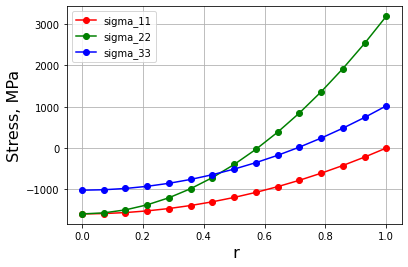

In [56]:
#avr_stress = average_val_np(preprocessing_res_np(list_files[i])[2][::,j-1])
r_1= np.linspace(0.00000001,R1[0],15)
plt.figure(1)



plt.plot(r_1/R1[0],Res_stress_Kolmogorov_Kuznetsova()[0],'-o',color='red',label='sigma_11')
plt.plot(r_1/R1[0],Res_stress_Kolmogorov_Kuznetsova()[1],'-o',color='green',label='sigma_22')
plt.plot(r_1/R1[0],Res_stress_Kolmogorov_Kuznetsova()[2],'-o',color='blue',label='sigma_33')



plt.ylabel(' Stress, MPa ', fontsize=16)
plt.xlabel(' r', fontsize=16)
plt.legend(loc=2)
plt.grid(True)
plt.show()

In [57]:
#К вопросу о том, как распределены напряжения и деформации по длине заготовки

In [58]:
#К вопросу о том ,  как в процентном соотношении распределены значения искомых характеристик

In [59]:
list_0771_1_l01_fric_010 = ['+0771_1_l01_fric_010bell.txt', 
                            '+0771_1_l01_fric_010concave.txt',
                            '+0771_1_l01_fric_010convex.txt', 
                            '+0771_1_l01_fric_010elliptical.txt',
                            '+0771_1_l01_fric_010parabolic.txt',
                            '+0771_1_l01_fric_010conical.txt'
                           ]
list_0771_1_l01_fric_025 = ['+0771_1_l01_fric_025bell.txt', 
                            '+0771_1_l01_fric_025concave.txt',
                            '+0771_1_l01_fric_025convex.txt', 
                            '+0771_1_l01_fric_025elliptical.txt',
                            '+0771_1_l01_fric_025parabolic.txt',
                            '+0771_1_l01_fric_025conical.txt'
                            ]
list_0771_1_l01_fric_050 = ['+0771_1_l01_fric_050bell.txt', 
                            '+0771_1_l01_fric_050concave.txt',
                            '+0771_1_l01_fric_050convex.txt', 
                            '+0771_1_l01_fric_050elliptical.txt',
                            '+0771_1_l01_fric_050parabolic.txt',
                            '+0771_1_l01_fric_050conical.txt'
                            ]



In [60]:
list_thermal_2450_1_l03_fric_050 = list_of_files(['+2450_1_l03_fric_050_bell_thermal.txt',
                             '+2450_1_l03_fric_050_twin-elliptical_thermal.txt', 
                             '+2450_1_l03_fric_050_parabolic_thermal.txt',
                             '+2450_1_l03_fric_050_convex_thermal.txt',
                            '+2450_1_l03_fric_050_conical_thermal.txt'
                           ])


OSError: C:\Users\acer\txt_итог_отчет\+2450_1_l03_fric_050_conical_thermal.txt not found.

In [ ]:
labels = ['Bell', 'Twin-elliptical', 'Parabolic', 'Convex', 'Conical']
average_stress_intensity_np(list_thermal_2450_1_l03_fric_050, R1[2], labels)
nt11_nodes(list_thermal_2450_1_l03_fric_050, R1[2], labels)
TEMP_integ_point(list_thermal_2450_1_l03_fric_050, R1[2], labels)
average_stress_intensity(list_thermal_2450_1_l03_fric_050, R1[2], labels)
average_strain_intensity(list_thermal_2450_1_l03_fric_050, R1[2], labels)
min_max_avr_strain_intensity(list_thermal_2450_1_l03_fric_050, R1[2], labels)
min_max_avr_stress_intensity(list_thermal_2450_1_l03_fric_050, R1[2], labels)
plot_result_stress_min_max_avr_v(list_thermal_2450_1_l03_fric_050, R1[2], labels)

In [61]:
plot_result_stress_min_max_avr_v(list_thermal_2450_1_l03_fric_050, R1[2], labels)
plot_result_stress_avr_v(list_thermal_2450_1_l03_fric_050, R1[2], labels)

NameError: name 'list_thermal_2450_1_l03_fric_050' is not defined

In [62]:
list_1 = list_of_files(['+2450_1_l05_fric_050bell.txt',
                        '+2450_1_l05_fric_050twin-elleptical.txt',
                        '+2450_1_l05_fric_050parabolic.txt',
                        '+2450_1_l05_fric_050convex.txt',
                        '+2450_1_l05_fric_050conical.txt'
                                ])
labels = ['Bell', 'Twin-elliptical', 'Parabolic', 'Convex', 'Conical']
plot_result_stress_avr_v(list_1, R1[2], labels)
plot_result_strain_avr_v(list_1, R1[2], labels)

TypeError: plot_result_stress_avr_v() missing 1 required positional argument: 'name'

In [63]:
list_conic_and_bell_2450_1_l0_fric_050 = list_of_files(['+2450_1_l0_fric_050conical.txt',
                                                    '+2450_1_l0_fric_050_conical_thermal.txt',
                                                    '+2450_1_l0_fric_050bell.txt',
                                                    '+2450_1_l0_fric_050_bell_thermal.txt'
                           ])
labels = ['Conical - isothermal', 'Conical - thermal', 'Bell - isothermal', 'Bell - thermal']
name = 'conical_vs_bell_2450_1_l0_fric_050_'
average_stress_intensity_np(list_conic_and_bell_2450_1_l0_fric_050, R1[2], labels, name)
average_strain_intensity(list_conic_and_bell_2450_1_l0_fric_050, R1[2], labels, name)
plot_result_stress_avr_v(list_conic_and_bell_2450_1_l0_fric_050, R1[2], labels, name)
plot_result_strain_avr_v(list_conic_and_bell_2450_1_l0_fric_050, R1[2], labels, name)

OSError: C:\Users\acer\txt_итог_отчет\+2450_1_l0_fric_050_conical_thermal.txt not found.

In [64]:
calibr = ['l0', 'l01', 'l03', 'l05', 'l075']
for i in range(0, len(calibr)):
    list1 = list_of_files(['+0771_1_' + calibr[i] + '_fric_050conical.txt',
                            '+0771_1_' + calibr[i] + '_fric_050_conical_thermal.txt',
                            '+0771_1_' + calibr[i] + '_fric_050bell.txt',
                            '+0771_1_' + calibr[i] + '_fric_050_bell_thermal.txt'
                           ])
    labels = ['Conical - isothermal', 'Conical - thermal', 'Bell - isothermal', 'Bell - thermal']
    name = 'conical_vs_bell_0771_1_' + calibr[i] + '_fric_050_'
    average_stress_intensity_np(list1, R1[1], labels, name)
    average_strain_intensity(list1, R1[1], labels, name)
    plot_result_stress_avr_v(list1, R1[1], labels, name)
    plot_result_strain_avr_v(list1, R1[1], labels, name)

OSError: C:\Users\acer\txt_итог_отчет\+0771_1_l0_fric_050_conical_thermal.txt not found.

Разные трения

In [65]:
def average_stress_intensity_np_all_in_one(list_files, R1, labels, name):  # для типов волок, трения маркерами
    plt.figure(figsize=(11,10)) # plt.figure(figsize=(13,9))

    global colours_
    global markers_
    for i in range(0,len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        sigma = average_val_np(preprocessing_res_np(list_files[i])[2][::,4])
        if i < 5:
            plt.plot(x_1/R1[i//5],sigma, linestyle[i//5],markersize=9, color = colours_[i%5], label=labels[i%5])
        else:
            plt.plot(x_1/R1[i//5],sigma, linestyle[i//5],markersize=9, color = colours_[i%5])

    plt.xlim(0, 1.01)
    plt.tick_params(axis='x', length=10, labelsize = 20, zorder=15)
    plt.tick_params(axis='y', length=10, labelsize = 20, zorder=15)
    plt.xticks(np.arange(0, 1.02, 0.2))

    plt.ylabel('$\sigma_{i}$, MPa ', fontsize=24) #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=24) #, fontname='Times New Roman')
    # plt.legend(loc='best', fontsize = 24) #plt.legend(loc='best')

    plt.legend(loc='upper right', fontsize = 24 ,bbox_to_anchor=(1.25,1), shadow=False, ncol=1)
    plt.savefig(name + 'stress_intensity_avr' + '.png', dpi = 600)
    plt.show()


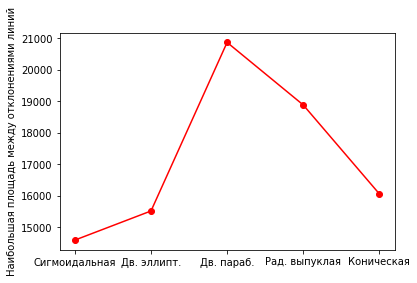

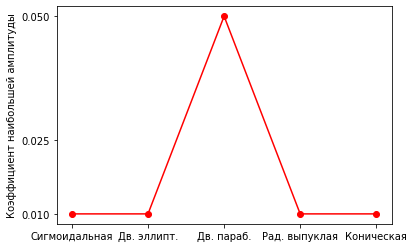

In [66]:
coefficients_plot = []
fric = ['010', '025', '050']
types = ['bell', 'twin-elleptical', 'parabolic', 'convex', 'conical']
type_rus = ['Сигмоидальная', 'Дв. эллиптическая', 'Дв. параболическая', 'Радиальная выпуклая', 'Коническая']

list1 = []
labels =[]

for i in range(0, len(fric)):
    for j in range(0, len(types)):
        list1.append('+2450_1_l05_fric_' + fric[i] + types[j] + '.txt')
        labels.append(type_rus[j])
# for i in range(0, len(fric)):
#     for ind, type_ in enumerate(types):
#         list1.append('+2450_1_l05_fric_' + fric[i] + type_ + '.txt')
#         labels.append(type_rus[ind])
a = list_of_files(list1)

    # if i != 1:
    #     name = LABELS[i] + '_different_fric_2450_1_l05'
    #     labels = [LABELS[i] + '_01', LABELS[i] + '_025', LABELS[i] + '_05']
    # else:
    #     el = 'twin-elliptical'
    #     name = el + '_different_fric_2450_1_l05'
    #     labels = [el + '_10', el + '_025', el + '_05']

name = '_diff_types_and_diff_fric_+2450_1_l05'


    #average_stress_intensity_np_all_in_one(a, R1, labels, name)
average_stress_intensity_np(a, R1[2], labels, name)


    #average_strain_intensity(list1, R1[2], labels, name)
    #plot_result_stress_avr_v(list1, R1[2], labels, name)
    #plot_result_strain_avr_v(list1, R1[2], labels, name)
    # min_max_avr_strain_intensity(list1, R1[2], labels, name
# )
    # min_max_avr_stress_intensity(list1, R1[2], labels, name)
    #plot_result_stress_min_max_avr_v(list1, R1[2], labels, name)

In [130]:
def analysis(list_files, R1, labels, name):
    # plt.figure(figsize=(16,10)) # plt.figure(figsize=(13,9))
    types = ['Сигмоидальная', 'Дв. эллипт.', 'Дв. параб.', 'Рад. выпуклая', 'Коническая']
    frictions = np.array((0.01, 0.025, 0.05))
    global colours_
    global markers_

    result = np.zeros(len(list_files)//3)
    amplitudes = np.zeros(len(list_files))
    max_amplitude = np.zeros(len(list_files)//3)
    min_amplitude = np.zeros(len(list_files)//3)
    fr_max = np.zeros(len(list_files)//3)
    fr_min = np.zeros(len(list_files)//3)

    for i in range(0,len(list_files)):
        sigma = average_val_np(preprocessing_res_np(list_files[i])[2][::,4])
        if i == 0:
            sigmas = np.zeros((len(list_files), len(sigma)))
        sigmas[i] = np.copy(sigma)
        amplitudes[i] = np.max(sigmas[i]) - np.min(sigmas[i])

    S = np.zeros(3)
    variations = np.zeros(3)
    for i in range(len(list_files)//3):
        dx = 1 / (len(sigmas[0]) - 1)
        S[0] = (2. * np.sum(sigmas[i]) - sigmas[i][0] - sigmas[i][-1])
        S[1] = (2. * np.sum(sigmas[i+5]) - sigmas[i+5][0] - sigmas[i+5][-1])
        S[2] = (2. * np.sum(sigmas[i+10]) - sigmas[i+10][0] - sigmas[i+10][-1])
        for j in range(len(sigmas[0])-1):
            variations[0] += (np.abs(sigmas[i][j] - sigmas[i+5][j]) + np.abs(sigmas[i][j+1] - sigmas[i+5][j+1])) * dx
            variations[1] += (np.abs(sigmas[i+5][j] - sigmas[i+10][j]) + np.abs(sigmas[i+5][j+1] - sigmas[i+10][j+1])) * dx
            variations[2] += (np.abs(sigmas[i][j] - sigmas[i+10][j]) + np.abs(sigmas[i][j+1] - sigmas[i+10][j+1])) * dx
        result[i] = (np.max(variations) - np.min(variations)) / np.min(S) * 100

    helper = np.zeros(3)
    for i in range(len(list_files)//3):
        helper[0] = amplitudes[i]
        helper[1] = amplitudes[i+5]
        helper[2] = amplitudes[i+10]
        max_amplitude[i] = np.max(helper)
        fr_max[i] = frictions[np.argmax(helper)]
        fr_min[i] = frictions[np.argmin(helper)]

    return result, max_amplitude, min_amplitude, fr_max, fr_min

In [131]:
coefficients_plot = []
radiuses = ['0420', '0771','2450']
fric = ['010', '025', '050']
types = ['bell', 'twin-elleptical', 'parabolic', 'convex', 'conical']
type_rus = ['Сигмоидальная', 'Дв. эллиптическая', 'Дв. параболическая', 'Радиальная выпуклая', 'Коническая']


list1 = []
labels =[]

for ind, rad in enumerate(radiuses):
    for i in range(0, len(fric)):
        for j in range(0, len(types)):
            list1.append('+' + rad + '_1_l05_fric_' + fric[i] + types[j] + '.txt')
            labels.append(type_rus[j])
    name = 'analysis' + '_' + rad + 'fric_an' + str(ind)
    a = list_of_files(list1)
    result, max_amplitude, min_amplitude, fr_max, fr_min = analysis(a[ind*15: (ind+1)*15], R1[ind], labels, name)
    if ind == 0:
        Results = np.zeros((3, result.shape[0]))
        Max_amplitudes = np.zeros((3, max_amplitude.shape[0]))
        Min_amplitudes = np.zeros((3, min_amplitude.shape[0]))
        Fr_maxs = np.zeros((3, fr_max.shape[0]))
        Fr_mins = np.zeros((3, fr_min.shape[0]))
    Results[ind] = result
    Max_amplitudes[ind] = max_amplitude
    Min_amplitudes[ind] = min_amplitude
    Fr_maxs[ind] = fr_max
    Fr_mins[ind] = fr_min


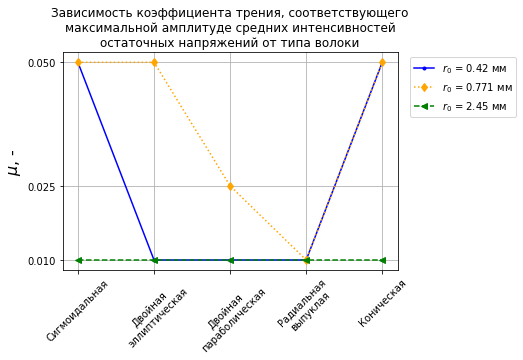

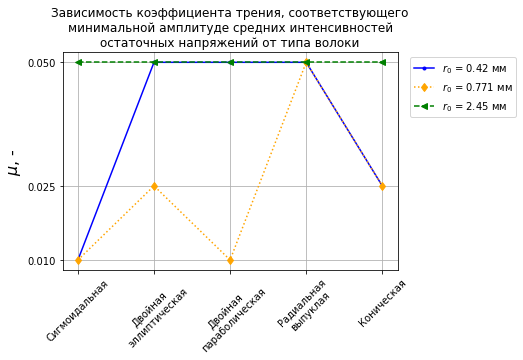

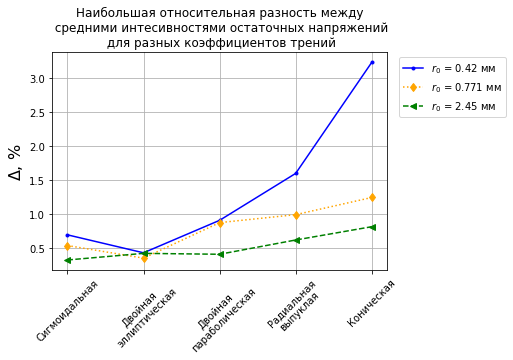

In [135]:
r_labels = ['0.42', '0.771', '2.45']
xax = ['Сигмоидальная', 'Двойная\nэллиптическая', 'Двойная\nпараболическая', 'Радиальная\nвыпуклая', 'Коническая']
for i in range(len(Fr_maxs)):
    plt.plot(xax, Fr_maxs[i], color = colours_[i], linestyle = linestyle[i], marker = markers_[i], label = '$r_0$ = ' + r_labels[i] + ' мм')
plt.title('Зависимость коэффициента трения, соответствующего\nмаксимальной амплитуде средних интенсивностей\nостаточных напряжений от типа волоки')#, fontsize = 16)
plt.ylabel('$\mu$, -', fontsize = 16)
plt.tick_params(axis='x', labelrotation = 45)

plt.yticks([0.01, 0.025, 0.05])
plt.legend(loc = 'upper right', bbox_to_anchor=(1.37, 1.0), shadow=False, ncol=1)
plt.grid(visible = True)
plt.savefig(name + 'max_ampl_coeff' + '.png', dpi = 600, bbox_inches='tight')
plt.show()

for i in range(len(Fr_mins)):
    plt.plot(xax, Fr_mins[i], color = colours_[i], linestyle = linestyle[i], marker = markers_[i], label = '$r_0$ = ' + r_labels[i] + ' мм')
plt.title('Зависимость коэффициента трения, соответствующего\nминимальной амплитуде средних интенсивностей\nостаточных напряжений от типа волоки')#, fontsize = 16)
plt.ylabel('$\mu$, -', fontsize = 16)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.37, 1.0), shadow=False, ncol=1)
plt.tick_params(axis='x', labelrotation = 45)


plt.yticks([0.01, 0.025, 0.05])
plt.grid(visible = True)
plt.savefig(name + 'min_ampl_coeff' + '.png', bbox_inches='tight', dpi = 600)
plt.show()

for i in range(len(Results)):
    plt.plot(xax, Results[i], color = colours_[i], linestyle = linestyle[i], marker = markers_[i], label = '$r_0$ = ' + r_labels[i] + ' мм')
plt.ylabel('$\Delta$, %', fontsize = 16)
plt.tick_params(axis='x', labelrotation = 45)

plt.title('Наибольшая относительная разность между\n средними интесивностями остаточных напряжений\n для разных коэффициентов трений')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.37, 1.0), shadow=False, ncol=1)

plt.grid(visible = True)
plt.savefig(name + 'max_rel_delta_S_frac_minS' + '.png', bbox_inches='tight', dpi = 600)
plt.show()

In [124]:
def average_stress_intensity_np_tesis(list_files, R1, labels, name):
    plt.figure(figsize=(11,10)) # plt.figure(figsize=(13,9))
    global colours_
    markers_ = ['-', '-', '-', '-', '-', '--', '--', '--', '--', '--', ':', ':', ':', ':', ':']
    for i in range(0,len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        sigma = average_val_np(preprocessing_res_np(list_files[i])[2][::,4])
        plt.plot(x_1/R1,sigma, markers_[i],markersize=9, color = colours_[i], linewidth=4)#, label=labels[i])

    plt.xticks(np.arange(0, 1.02, 0.05))
    # plt.xlim(0, 1.01)
    # plt.axis('equal')
    # plt.ylim(100, 500)
    plt.ylim(0, 450)
    # plt.xlim(0.58, 0.82)
    plt.xlim(0.62, 0.85)
    # plt.gca().set_aspect('equal', adjustable='box')

    plt.tick_params(axis='x', length=10, labelsize = 20, zorder=15)
    plt.tick_params(axis='y', length=10, labelsize = 20, zorder=15)


    plt.savefig(name + 'stress_intensity_avr_part' + '.png', dpi = 600)
    plt.show()

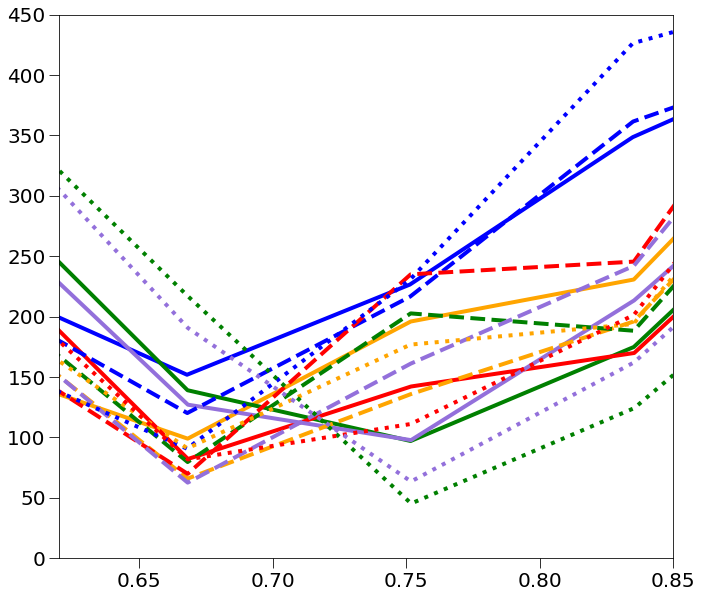

In [125]:
fric = ['010', '025', '050']
types = ['bell', 'twin-elleptical', 'parabolic', 'convex', 'conical']
type_rus = ['Сигмоидальная', 'Дв. эллиптическая', 'Дв. параболическая', 'Радиальная выпуклая', 'Коническая']

list1 = []
labels =[]

for i in range(0, len(fric)):
    for j in range(0, len(types)):
        list1.append('+0420_1_l05_fric_' + fric[i] + types[j] + '.txt')
        labels.append(type_rus[j])
a = list_of_files(list1)
name = '_diff_types_and_diff_fric_+0420_1_l05'
average_stress_intensity_np_tesis(a, R1[0], labels, name)

In [126]:
def average_stress_intensity_np_tesis_full(list_files, R1, labels, name):
    plt.figure(figsize=(13,9))
    global colours_
    markers_ = ['-', '-', '-', '-', '-', '--', '--', '--', '--', '--', ':', ':', ':', ':', ':']

    for i in range(0,len(list_files)):
        x_1 = average_val_np(preprocessing_res_np(list_files[i])[0])
        sigma = average_val_np(preprocessing_res_np(list_files[i])[2][::,4])
        if i < 5:
            plt.plot(x_1/R1,sigma, markers_[i],markersize=9, color = colours_[i], label=labels[i])
        else:
            plt.plot(x_1/R1,sigma, markers_[i],markersize=9, color = colours_[i])

    plt.xlim(0, 1.01)
    plt.tick_params(axis='x', length=10, labelsize = 20, zorder=15)
    plt.tick_params(axis='y', length=10, labelsize = 20, zorder=15)
    plt.xticks(np.arange(0, 1.02, 0.2))

    plt.ylabel('$\sigma_{i}$, MПа ', fontsize=24) #, fontname='Times New Roman')
    plt.xlabel(' r, -', fontsize=24) #, fontname='Times New Roman')
    plt.legend(loc='lower left', fontsize=18) #plt.legend(loc='best')

    plt.savefig(name + 'stress_intensity_avr_full_rus' + '.png', dpi = 600)
    plt.show()


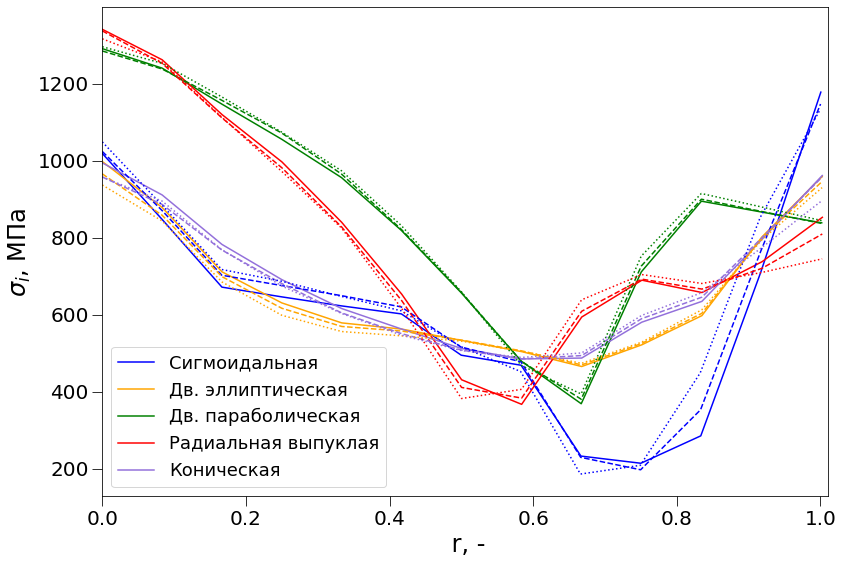

In [129]:
fric = ['010', '025', '050']
types = ['bell', 'twin-elleptical', 'parabolic', 'convex', 'conical']
type_rus = ['Сигмоидальная', 'Дв. эллиптическая', 'Дв. параболическая', 'Радиальная выпуклая', 'Коническая']

list1 = []
labels =[]

for i in range(0, len(fric)):
    for j in range(0, len(types)):
        list1.append('+2450_1_l05_fric_' + fric[i] + types[j] + '.txt')
        labels.append(type_rus[j])
a = list_of_files(list1)
name = '_diff_types_and_diff_fric_+2450_1_l05_full'
average_stress_intensity_np_tesis_full(a, R1[2], labels, name)